In [88]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

%matplotlib inline
sns.set()
# its possible to look at Confirmed,Recovered or Deaths simply by changing the filename below
# assign either of ['Confirmed','Deaths','Recovered'] to param below:

param = 'Confirmed'

df_confirmed = pd.read_csv(
    '../../corona/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-' + param + '.csv',
                sep=',',encoding='ISO8859-1')
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566


In [89]:
country_list = sorted(df_confirmed['Country/Region'].unique())
#country_list


In [90]:
countries = df_confirmed.groupby('Country/Region')
country_increase = pd.DataFrame(countries.sum().iloc[:,-1] - countries.sum().iloc[:,-2],columns=['increase'])
country_increase['today'] = countries.sum().iloc[:,-1]
country_increase['previous_day'] = countries.sum().iloc[:,-2]
country_increase['factor'] = countries.sum().iloc[:,-1] / countries.sum().iloc[:,-2]
country_increase['factor'] = country_increase['factor'].replace(np.inf,np.nan)
country_increase.sort_values(by='increase',ascending=False,inplace=True)
country_increase = country_increase[['previous_day','today','increase','factor']]
country_increase.head(40)
                                                                    

,previous_day,today,increase,factor
Country/Region,,,,
Italy,24747,27980,3233,1.130642
Spain,7798,9942,2144,1.274942
France,4513,6650,2137,1.473521
Germany,5795,7272,1477,1.254875
US,3499,4632,1133,1.323807
Iran,13938,14991,1053,1.075549
United Kingdom,1145,1551,406,1.354585
Netherlands,1136,1414,278,1.244718
Belgium,886,1058,172,1.194131


In [91]:
country_increase[['previous_day','today','increase']].sum()

previous_day    167449
today           181546
increase         14097
dtype: int64

In [92]:
country_increase.describe()

,previous_day,today,increase,factor
count,156.000000,156.000000,156.000000,144.000000
mean,1073.391026,1163.756410,90.365385,1.371193
std,6908.076916,7032.776943,388.036781,0.774094
min,0.000000,0.000000,-14.000000,0.652174
25%,2.000000,3.000000,0.000000,1.000000
50%,23.000000,24.500000,4.000000,1.131988
75%,114.500000,143.250000,15.500000,1.326188
max,81003.000000,81033.000000,3233.000000,6.000000


/usr/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecatio

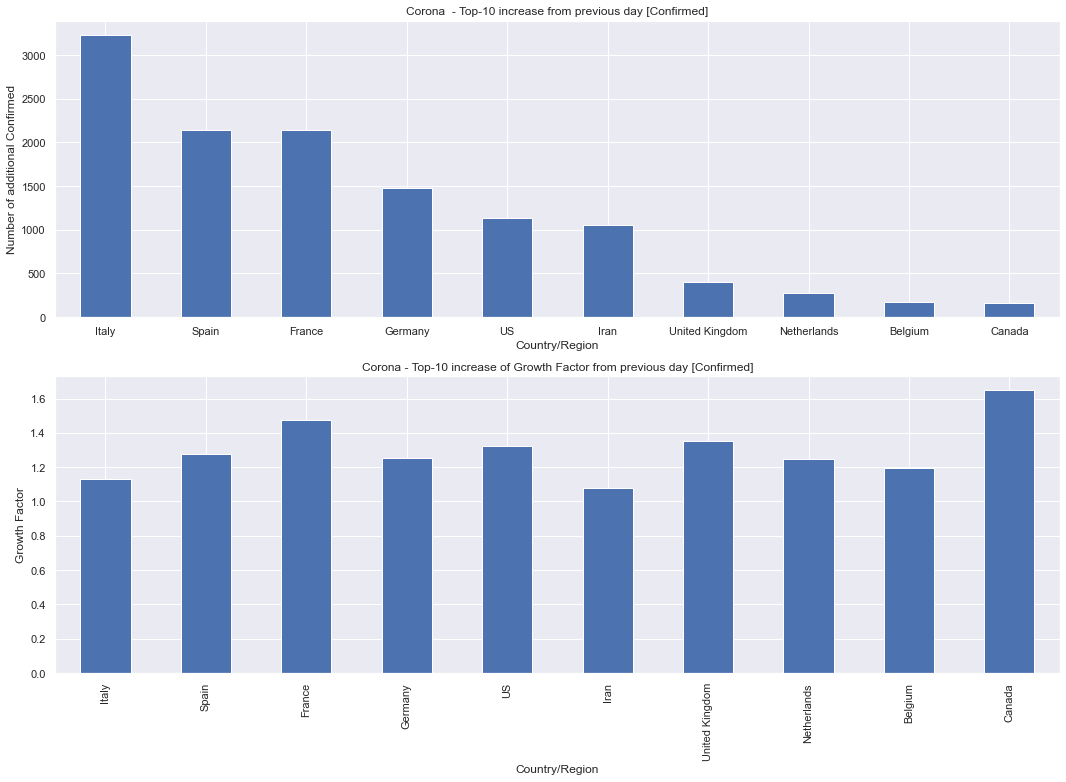

In [93]:
# pandas plot generates a warning about depreciated feature. Nothing to do bout it, it's pandas internal
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Corona  - Top-10 increase from previous day [{}]'.format(param))
plt.ylabel('Number of additional ' + param)
country_increase['increase'][:10].plot(kind='bar')
plt.xticks(rotation=0)
plt.subplot(212)
plt.title('Corona - Top-10 increase of Growth Factor from previous day [{}]'.format(param))
plt.ylabel('Growth Factor')
country_increase['factor'][:10].plot(kind='bar')
plt.savefig('top_10_daily_growth.jpg',format='jpg')

In [94]:
my_countries = ['Italy','Spain','US','Sweden','Finland','Norway','Denmark']

mask = country_increase['increase'] == 0
#zero_growth = country_increase[mask]
#ero_growth
country_increase.loc[my_countries].sort_values('increase')

,previous_day,today,increase,factor
Country/Region,,,,
Finland,244,277,33,1.135246
Denmark,875,932,57,1.065143
Sweden,1022,1103,81,1.079256
Norway,1221,1333,112,1.091728
US,3499,4632,1133,1.323807
Spain,7798,9942,2144,1.274942
Italy,24747,27980,3233,1.130642


In [95]:
#### SELECT COUNTRY OF INTEREST
#### for other countries, replace the country name in the line below ###
####

country_of_interest = 'Spain'

####
####

us = countries.get_group(country_of_interest)
us.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
18,NaN,40.0,-4.0,0,0,0,0,0,0,0,...,500,673,1073,1695,2277,2277,5232,6391,7798,9942


In [96]:
us_count = us.iloc[:,4:].sum()
us_count.index = pd.to_datetime(us_count.index)
us_count = pd.DataFrame(us_count,columns=['confirmed'])
us_count['factor'] = us_count['confirmed'] / us_count['confirmed'].shift()
us_count['factor'].replace(np.inf,np.nan)
us_count['day'] = np.arange(1,len(us_count) + 1)
us_count = us_count.loc[us_count['confirmed'] > 0]
us_count['factor'] = us_count['factor'].replace(np.inf,np.nan)

# FILTER FOR GROWTH HAVING STARTED
us_count = us_count.loc[us_count['confirmed'] > 100]
us_count.tail(60)

,confirmed,factor,day
2020-03-02,120,1.428571,40
2020-03-03,165,1.375000,41
2020-03-04,222,1.345455,42
2020-03-05,259,1.166667,43
2020-03-06,400,1.544402,44
2020-03-07,500,1.250000,45
2020-03-08,673,1.346000,46
2020-03-09,1073,1.594354,47
2020-03-10,1695,1.579683,48
2020-03-11,2277,1.343363,49


In [97]:
us_count.describe()


,confirmed,factor,day
count,15.000000,15.000000,15.000000
mean,2601.600000,1.399191,47.000000
std,3182.101345,0.295707,4.472136
min,120.000000,1.000000,40.000000
25%,329.500000,1.235761,43.500000
50%,1073.000000,1.345455,47.000000
75%,3754.500000,1.486486,50.500000
max,9942.000000,2.297760,54.000000


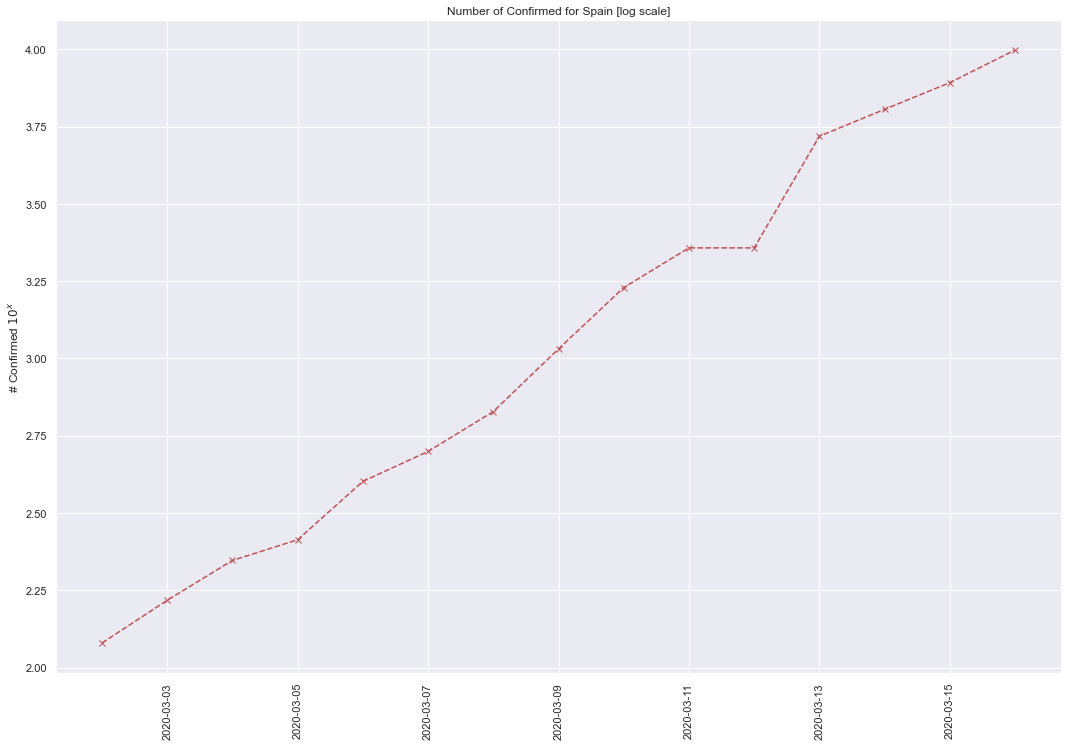

In [98]:
plt.figure(figsize=(18,12))
plt.title('Number of {} for '.format(param) + country_of_interest + ' [log scale]')
plt.plot(np.log10(us_count['confirmed']),'x--',color='r')
plt.ylabel(r'# {} $10^x$'.format(param))
plt.xticks(rotation=90)
plt.savefig('nr_{}_log_'.format(param) + country_of_interest + '.jpg',format='jpg')

In [99]:
factor_mean = us_count['factor'].mean()
factor_std = us_count['factor'].std()
day_mean = us_count['day'].mean()
day_std = us_count['day'].std()

def standardize(x):
    return (x - x.mean()) / x.std()

us_count['day'] = standardize(us_count['day'])
us_count['factor'] = standardize(us_count['factor'])
us_count.tail()

,confirmed,factor,day
2020-03-12,2277,-1.349955,0.670820
2020-03-13,5232,3.038711,0.894427
2020-03-14,6391,-0.600831,1.118034
2020-03-15,7798,-0.605457,1.341641
2020-03-16,9942,-0.420176,1.565248


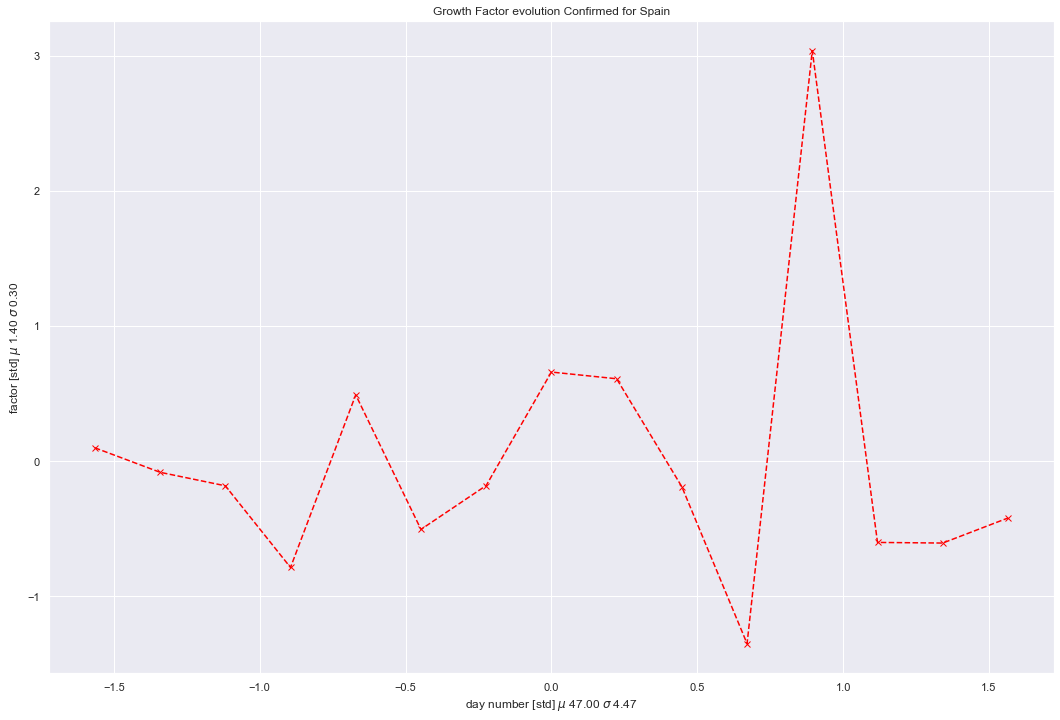

In [100]:
plt.figure(figsize=(18,12))
plt.title('Growth Factor evolution {} for '.format(param) + country_of_interest)
plt.plot(us_count['day'],us_count['factor'],'x--',color='red')
_=plt.xlabel(r'day number [std] $\mu$ {:.2f} $\sigma$ {:.2f}'.format(day_mean,day_std))
_=plt.ylabel(r'factor [std] $\mu$ {:.2f} $\sigma$ {:.2f}'.format(factor_mean,factor_std))
plt.savefig('growth_factor_evolution_{}'.format(param) + country_of_interest +'.jpg',format='jpg')

alpha mean -0.01 beta mean -0.01


Text(0.5, 1.0, 'lines simulated from priors')

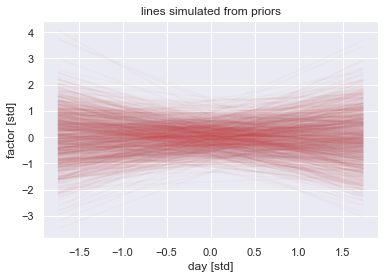

In [101]:
#FIGURE OUT PRIORS by random sampling
# purpose: to see that the priors, before seeing data, produce
# resonable regression lines, i.e. the lines should not extend beyond 3 standard deviations 
# at the y-axis.

def sim_linreq_mu(x,alpha,beta):
    return x * alpha + beta

#SIMULATE priors 
#HYPOTHESIS by looking at graph: 
alpha_mu = 0 #HYPOTHESIS: intercept at 0
alpha_sigma = 0.5
beta_mu = 0 #HYPOTHESIS: slope 0
beta_sigma = 0.5

size = 10000
# simulate priors based on params above
alpha = pm.rnormal(mu = alpha_mu,tau = 1 / alpha_sigma ** 2,size=size)
beta =  pm.rnormal(mu = beta_mu, tau = 1 / beta_sigma ** 2,size=size)

print ('alpha mean {:.2f} beta mean {:.2f}'.format(alpha.mean(),beta.mean()))

# sample simulated priors
nr_rows = 1000
alphas = np.random.choice(alpha,replace=True,size=nr_rows)
betas = np.random.choice(beta,replace=True,size=nr_rows)

# build simulated regression lines
X = np.linspace(min(us_count['day']),max(us_count['day']),nr_rows)
X = standardize(X)
lines = [X[i] * betas + alphas for i in range(len(X))]

_=plt.plot(X,lines,color='r',alpha=0.03)
plt.ylabel('factor [std]')
plt.xlabel('day [std]')
plt.title('lines simulated from priors')


In [102]:
#REGRESSION
alpha = pm.Normal('alpha',mu=alpha_mu,tau = 1 / alpha_sigma ** 2)
beta = pm.Normal('beta',mu=beta_mu, tau = 1/ beta_sigma ** 2)
sigma = pm.Uniform('sigma',lower=0,upper=10)

us_count.dropna(inplace = True) # pymc doesnt like them
x = us_count['day']

@pm.deterministic()
def linreq_mu(x=x,alpha=alpha,beta=beta):
    return x * beta + alpha

likelihood = pm.Normal('likelihood',
                     mu=linreq_mu,
                     tau= 1 / sigma ** 2,
                     observed = True,
                      value=us_count['factor'])

model = pm.Model([alpha,beta,sigma,linreq_mu,likelihood])
map_ = pm.MAP(model)
map_.fit()

mcmc = pm.MCMC(model)
mcmc.sample(10000,5000,2)

alpha_post = mcmc.trace('alpha')[:]
beta_post = mcmc.trace('beta')[:]
sigma_post = mcmc.trace('sigma')[:]
linreq_mu_post = mcmc.trace('linreq_mu')[:,0]

result = pd.DataFrame({'alpha_post':alpha_post,
                       'beta_post':beta_post,
                       'sigma_post':sigma_post,
                       'linreq_mu_post':linreq_mu_post})

result.describe()


 [-----------------100%-----------------] 10000 of 10000 complete in 13.1 sec

,alpha_post,beta_post,sigma_post,linreq_mu_post
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.010537,0.036527,1.109455,-0.046637
std,0.216582,0.260321,0.234216,0.463141
min,-0.804407,-0.943213,0.613780,-1.859590
25%,-0.102773,-0.134381,0.945905,-0.356972
50%,-0.021873,0.042097,1.075919,-0.060966
75%,0.150960,0.208814,1.232081,0.253484
max,0.769459,1.083947,2.622754,2.026578


In [103]:
# LEAST SQUARES REGRESSION for comparison
slope,intercept,_,_,_ = sps.linregress(x,us_count['factor'])

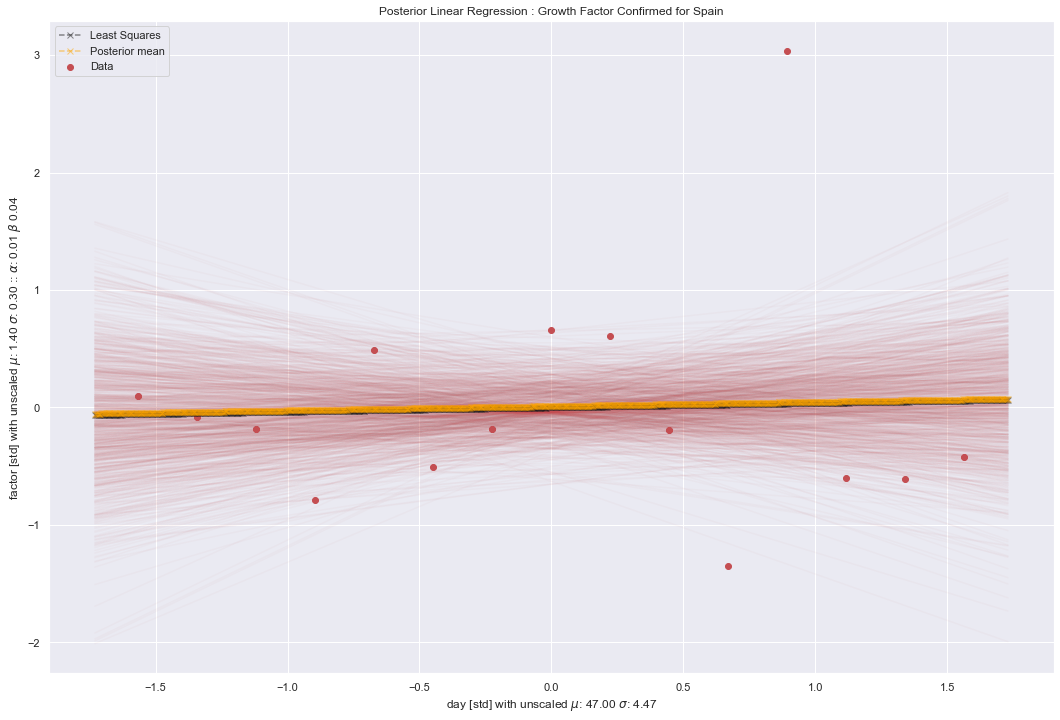

In [104]:
#PLOT POSTERIOR
alphas = np.random.choice(result['alpha_post'],replace=True,size=nr_rows)
betas = np.random.choice(result['beta_post'],replace=True,size=nr_rows)
sigmas = np.random.choice(result['sigma_post'],replace=True,size=nr_rows)

mus = np.array([X[i] * betas + alphas for i in range(len(X))])

lsq_mus = np.array([X[i] * slope + intercept for i in range(len(X))])

plt.figure(figsize=(18,12))
plt.title('Posterior Linear Regression : Growth Factor {} for '.format(param) + country_of_interest)
plt.plot(X,mus,color='r',alpha=0.03)
plt.plot(X,lsq_mus,'x--',color='k',label='Least Squares',alpha=0.5)
plt.plot(X,np.array([X[i] * beta_post.mean() + alpha_post.mean() for i in range(len(X))]),
        'x--',color='orange',label='Posterior mean',alpha=0.5)

plt.scatter(us_count['day'],us_count['factor'],color='r',label='Data')

xlabel = r'day [std] with unscaled $\mu$: {:.2f} $\sigma$: {:.2f}'.format(
    day_mean,
    day_std)

ylabel = r'factor [std] with unscaled $\mu$: {:.2f} $\sigma$: {:.2f} :: $\alpha$: {:.2f} $\beta$ {:.2f}'.format(
    factor_mean,
    factor_std,
    alpha_post.mean(),
    beta_post.mean())

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc='upper left')
plt.savefig('linear_regression_{}'.format(param) + country_of_interest +'.jpg',format='jpg')




